# **Google Playstore Rating Prediction Term Project**



**Phase 1:**

### Data Selection

**해결하고자 하는 문제**

이 프로젝트에서는 Google Play Store에 등록된 앱들의 정보(카테고리, 리뷰 수, 설치 수, 가격, 평점, 앱 크기, 콘텐츠 등급 등)를 활용하여 앱의 “평점(Rating)”을 예측하는 회귀(regression) 모델을 구축할 계획입니다.

**문제정의 배경**:

- 앱 개발자나 마케터는 출시 전 앱의 특성(가격, 카테고리, 설치 수, 리뷰 수, 업데이트 횟수 등)에 따라 앱 평점이 어느 정도일지 예측할 수 있다면, 앱 개선 방향성 제시, 마케팅 전략 수립, 가격 정책 설정 등에 도움을 받을 수 있습니다.
- 앱 스토어에 대한 이해를 높이고, 어떤 특징이 높은 평점을 유도하는지 파악할 수 있다면, 궁극적으로 유저 만족도 개선에 기여할 수 있습니다.

**프로젝트 목표**:

- 앱의 다양한 속성(카테고리, 설치 수, 리뷰 수, 가격 등등)으로부터 평점(Rating)을 예측하는 머신러닝 회귀 모델 개발하는 것입니다.
- 다양한 모델(선형회귀, 랜덤포레스트, 그라디언트 부스팅과 같은 앙상블 모델 등)을 비교할 것입니다. 전처리(결측치 처리, 이상치 제거, 범주형 인코딩, 스케일링) 및 하이퍼파라미터 튜닝을 통해 최적의 모델을 선정할 계획입니다.


**데이터셋 선정 및 출처**

**데이터셋**: Google Play Store Apps

**출처**: [Kaggle: Google Play Store Apps](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

**데이터셋 설명**:

이 데이터셋은 Google Play Store에 등록된 약 10,000여 개의 앱에 대한 정보와 특성을 포함하고 있다. 주요 feature는 다음과 같습니다.

- App: 앱 이름
- Category: 앱이 속한 카테고리
- Rating: 앱 평점 (목표변수, 연속형)
- Reviews: 리뷰 수 (수치형)
- Size: 앱 크기 (문자열 형태, 추후 변환 필요)
- Installs: 설치 수 (문자열 형태, 추후 변환 필요)
- Type: 유료/무료 여부 (범주형)
- Price: 가격 (문자열 형태, 추후 변환 필요)
- Content Rating: 콘텐츠 등급 (범주형)
- Genres: 장르 (범주형)
- Last Updated: 마지막 업데이트 날짜 (시간정보)
- Current Ver: 현재 버전 (문자열 형태)
- Android Ver: 최소 지원 안드로이드 버전 (문자열 형태)

**데이터셋 제한 조건 확인**:

- Feature 개수: 13개의 피쳐가 존재합니다. 일부 피쳐를 전처리하고 필요없는 열을 제거해도 10개 이상의 피쳐를 유지할 수 있습니다.
- Instance 개수: 약 10,000개 이상의 데이터가 존재합니다.


### 문제 설정 및 전체적인 과제 설계

**기계학습 모델 활용 방안**

이 문제는 앱의 특성을 활용해 앱 평점(Rating)을 예측하는 **회귀(Regression) 문제**로 정의하였습니다. 지도학습을 통해 다음과 같은 모델들을 고려할 수 있습니다.

- 선형 회귀(Linear Regression)
- 의사결정트리 기반 회귀(Decision Tree Regressor)
- 랜덤 포레스트 회귀(Random Forest Regressor)
- 그래디언트 부스팅 (Gradient Boosting Regressor, XGBoost, LightGBM 등)

여러 모델을 비교한 뒤 성능이 가장 우수한 모델을 최종적으로 선정할 계획입니다.

**현재 사용되고 있는 방법이나 해결책 존재 여부**

- 기존에는 앱 평점 관리를 위해 키워드 리서치, 리뷰 분석을 통한 정성적 접근이 주류였습니다.
- 최근에는 머신러닝을 활용한 텍스트 리뷰 감성 분석, 앱 스토어 메타데이터(가격, 장르, 카테고리, 다운로드 수) 등을 활용한 평점 예측 시도가 존재합니다.

이번 프로젝트에서는 공개된 데이터셋과 머신러닝 기법을 활용하여 평점 예측 문제에 접근하고, 다양한 모델 성능을 비교할 예정입니다.

**문제 정의**

Rating을 예측하는 것을 목표로 합니다.
- **정의**: 지도학습(Supervised Learning) → 회귀(Regression) 문제
- **입력(X)**: Category(범주형), Reviews(수치형), Installs(수치형 변환 필요), Size(수치형 변환 필요), Price(수치형 변환 필요), Content Rating(범주형), Type(범주형), 등
- **출력(y)**: Rating(연속형 값)

**모델의 성능 지표 선정 (3개)**

회귀 모델 평가를 위해 다음 세 가지 성능 지표를 사용할 계획입니다.

1. **MSE(Mean Squared Error)**
    - 예측값과 실제값의 차이를 제곱한 뒤 평균한 값
    - 큰 오차에 더 큰 페널티를 부여
2. **MAE(Mean Absolute Error)**
    - 예측값과 실제값의 차이 절댓값을 평균한 값
    - MSE보다 직관적이며 이상치에 덜 민감함
3. **R²(Coefficient of Determination)**
    - 모델이 종속 변수 변동성을 어느 정도 설명하는지를 나타내는 지표
    - 1에 가까울수록 모델이 타겟 변동성을 잘 설명함

**지표 선택 이유**:

- 평점(Rating)은 1~5 사이의 범위를 갖는 연속형 값입니다. MSE와 MAE를 통해 모델이 실제 평점에 얼마나 근접한 값을 예측하는지 정량화할 수 있다.
- MSE는 큰 오차에 민감하므로 잘못된 예측이 있는지 확인하기 좋고, MAE는 평균적인 예측 오차 수준을 파악하는데 유용합니다.
- R²는 모델이 베이스라인(평균 예측) 대비 얼마나 향상되었는지 정성적으로 파악할 수 있게 해줍니다.

**성과 측정 방법 및 목표 성능 설정**

- 성능 측정은 Train/Validation Split 및 K-fold Cross-Validation을 사용하여 일반화 능력을 평가할 계획입니다.
- 최종 모델 평가는 따로 분리한 Test-set을 사용할 예정입니다.
- 목표: R² 점수를 최대한 0보다 높게 하는 것을 목표로 합니다.
- MSE와 MAE를 가능한 낮추어, 평균적으로 앱 평점을 0.3~0.5 이내로 예측할 수 있는 것을 1차 목표로 하였습니다.


## Phase 2: 코드 구현

Library 추가



In [ ]:
import seaborn as sns # 그래픽 라이브라이
import matplotlib as mpl #그래프
import matplotlib.pyplot as plt #그래프
import numpy as np #수학적 기능 제공
import random
import pandas as pd #데이터 처리 및 가공에 사용됨
from sklearn.preprocessing import LabelEncoder # LabelEncoding에 사용됨
from sklearn.preprocessing import OneHotEncoder # OneHotEncoding에 사용됨
from sklearn.preprocessing import scale, normalize # 데이터 표준,정규화에 사용됨
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler # 아웃라이어에 강함
#from sklearn.preprocessing import QuantileTransformer # 아웃라이어에 강하고, 0,1값을 가짐
from sklearn import preprocessing
#import sklearn.preprocessing.data as QT
# from sklearn.preprocessing import Imputer #Missing 값 대체에 사용
from sklearn.feature_selection import VarianceThreshold #Feature Selection Variance
from sklearn.feature_selection import SelectKBest #Feature Selection Univarite
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE #Feature Selection With RFE
from sklearn.feature_selection import RFECV #Feature Selection With RFECV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

!pip install sklearn-evaluation
from sklearn_evaluation import plot # Data Evaluation에 사용됨
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 3.5 MB/s eta 0:00:00


**데이터셋 로드**

데이터셋을 로드하고 copy를 사용해서 데이터복사를 한 후, 그 데이터를 사용합니다.

df.info를 활용하여 데이터에 대한 정보를 얻습니다.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression

np.random.seed(42)  # 랜덤시드를 설정
# CSV 파일 경로 설정
file_path = '/content/drive/My Drive/machine_learning_dataset/googleplaystore.csv'

# CSV 파일 로드
df_original = pd.read_csv(file_path)

# 데이터 복사
df = df_original.copy()

# 데이터 확인 (EDA)
print("Initial data overview:")
print(df.info())

Initial data overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


df.shape를 사용하여 instance의 수와 feature의 수를 확인합니다.
그 결과, 10841개와 13개로, 데이터셋의 조건을 만족하는 것을 확인할 수 있습니다.

df.head를 사용하여 데이터가 어떤 식으로 구성되어있는지 확인합니다.

Size의 경우 M, K 같은 것이 사용되어서 이것들을 백만을 곱해주거나 천을 곱해주어 숫자 float 형태로 변형하는 것이 필요한 것을 이 과정에서 인지하였습니다.

In [ ]:
print("Number of instances:", df.shape[0])
print("Number of features:", df.shape[1])
df.head(5)

Number of instances: 10841
Number of features: 13


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


각 column 별 결측치의 개수를 확인해보았습니다.

Rating을 제외한 나머지는 결측치가 거의 없는 것을 확인할 수 있었습니다.

In [ ]:
# 각 열별 결측치 개수 확인
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


Rating을 찾는 것이 목표이기 때문에 Rating이 없는 결측치들은 우선 제거하였습니다.

제 프로젝트 흐름상 전처리를 먼저 진행하고
3번 파트인 '선택한 데이터셋의 각 feature 의 설명 및 유형, 그리고 instance 개수는 무엇인가?' 파트는 조금 뒤에 진행하는 방향으로 하였습니다. size와 review의 value들이 그냥 숫자로 이루어진 경우와 뒤에 M, K가 붙은 경우들이 섞여 있어서 이를 먼저 처리하고 3번 파트를 진행해야 했습니다. 그 외에도 '+', ',' 와 같은 기호들이 있어 전처리가 필요한 부분이 있음을 확인하여 이를 이후에 함수를 구현하여 해결하는 것으로 계획했습니다.

In [ ]:
# train-test split 수행
# 결측치 제거를 위한 Rating 기준 필터링 먼저 수행
df = df.dropna(subset=['Rating'])  # Rating 기준 결측치 제거

boxplot, histplot을 활용하여 이번 프로젝트에서 목표로 하고 있는 Rating이 어떤 식으로 분포되어있는지 데이터 분포를 시각화하여 확인하였습니다.

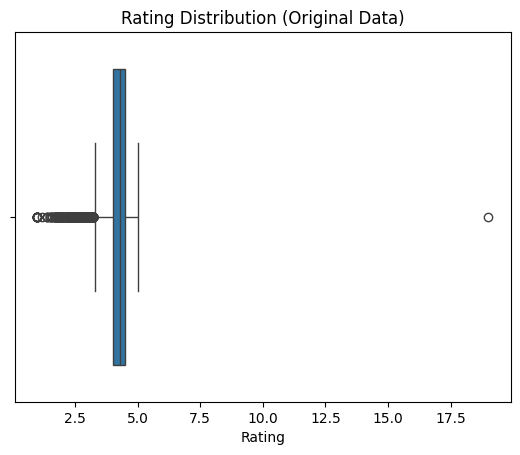

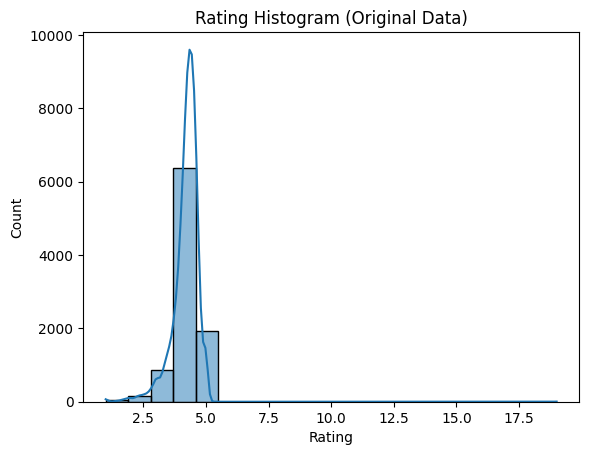

In [ ]:
# Rating에 대한 분포 확인
sns.boxplot(x=df['Rating'])
plt.title("Rating Distribution (Original Data)")
plt.show()

sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Rating Histogram (Original Data)")
plt.show()

특징 별 필요한 전처리 작업을 결정하였고 이를 함수를 구현함으로 진행하였습니다.

Size열에 있는 문자열 m, k 같은 것들을 분리하고 이를 해결하는 함수를 구현하고, 이를 적용시켰습니다.
이후 size 외에도 다른 부분들도 모두 함수를 만들고 이상치를 수정하고, 제거하는 과정을 진행하였습니다.

In [ ]:
# 'Size' 열의 문자열 처리 (숫자 변환)
def size_to_numeric(size):
    if isinstance(size, str):
        size = size.strip().lower()
        if 'm' in size:
            return float(size.replace('m', '')) * 1_000_000
        elif 'k' in size:
            return float(size.replace('k', '')) * 1_000
        elif size == 'varies with device':
            return np.nan
    return np.nan

df['Size'] = df['Size'].apply(size_to_numeric)
# 결측치 처리
df['Size'] = df['Size'].fillna(df['Size'].median())  # 중앙값으로 채우기

Installs열에도 size열을 처리한 것처럼 문자열을 처리하는 함수를 구현하고 이를 적용시켰습니다.

In [ ]:
# 'Installs' 열의 문자열 처리 (숫자 변환)
def installs_to_numeric(installs):
    if isinstance(installs, str):
        installs = installs.replace('+', '').replace(',', '').strip()
        if installs.isdigit():
            return float(installs)
    return np.nan

df['Installs'] = df['Installs'].apply(installs_to_numeric)
df['Installs'] = df['Installs'].fillna(df['Installs'].median())

Price 열의 문자열 또한 처리가 필요하여 이를 진행하였습니다.

In [ ]:
# 'Price' 열의 문자열 처리 (숫자 변환)
def price_to_numeric(price):
    if isinstance(price, str):
        price = price.replace('$', '').strip()
        if price.replace('.', '').isdigit():
            return float(price)
    return 0.0

df['Price'] = df['Price'].apply(price_to_numeric)

리뷰 부분에서 계속 오류가 나서 확인해봤는데 한 앱이 백만개 이상의 리뷰가 있어서 이게 3백만으로 표현이 안되고 3.0M으로 표기되어 변환이 원활하게 안 일어나는 case가 있어서 이를 해결하기 위해 이와 같은 함수를 작성하였습니다.

In [ ]:
# 'Reviews' 열의 문자열 처리 (숫자 변환)
def reviews_to_numeric(reviews):
    if isinstance(reviews, str):
        reviews = reviews.strip().lower()
        if 'm' in reviews:
            return float(reviews.replace('m', '')) * 1_000_000
    return np.nan

df['Reviews'] = df['Reviews'].apply(reviews_to_numeric)
# 결측치 처리
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].median())

이상치는 데이터의 전반적인 패턴이나 경향에서 크게 벗어나는 관측치를 의미합니다.

'Size', 'Installs', 'Reviews' 열에서 이상치를 탐지하고 제거하는 과정을 이와 같이 진행하였습니다.

(4.1. 이상치 수정하거나 제거)

In [ ]:
# 이상치 탐지 및 제거 (Size, Installs, Reviews)
for col in ['Size', 'Installs', 'Reviews']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

Reviews/Installs을 하여 설치된 것에 비해 얼마나 리뷰가 달렸는지를 보여주는 새로운 feature를 만들었습니다.

(4.6. 특징들을 조합하여 새로운 특징 생성)

In [ ]:
# 새로운 특징 생성
df['Reviews_to_Installs'] = df['Reviews'] / (df['Installs'] + 1)

'Rating','Size','Installs','Price'를 사용하여 이러한 수치형 특성 간의 상관관계를 분석하였습니다.

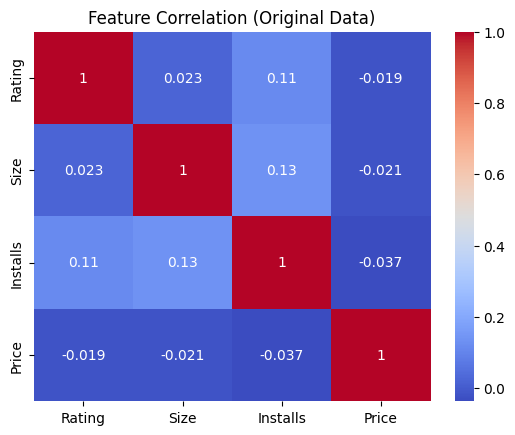

In [ ]:
numeric_cols = ['Rating','Size','Installs','Price']
if not df[numeric_cols].select_dtypes(include=np.number).empty:
    corr_matrix = df[numeric_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
    plt.title("Feature Correlation (Original Data)")
    plt.show()
else:
    print("No numerical features available for correlation analysis.")

선택한 데이터셋의 각 feature를 정의하였습니다.

categorical인지, numerical인지 구분하고, 그 안에서도 nominal인지, continuous인지, discrete인지 등을 구본하였습니다.

In [ ]:
# 3.1. Feature 설명 및 유형 정의
features = {
    "App": "categorical (nominal)",
    "Category": "categorical (nominal)",
    "Rating": "numerical (continuous)",
    "Reviews": "numerical (discrete)",
    "Size": "numerical (continuous)",
    "Installs": "numerical (continuous)",
    "Type": "categorical (nominal)",
    "Price": "numerical (continuous)",
    "Content Rating": "categorical (nominal)",
    "Genres": "categorical (nominal)",
    "Last Updated": "categorical (nominal)",
    "Current Ver": "categorical (nominal)",
    "Android Ver": "categorical (nominal)",
    "Reviews_to_Installs": "numerical (continuous)"
}

for feature, ftype in features.items():
    print(f"Feature: {feature}, Type: {ftype}")

Feature: App, Type: categorical (nominal)
Feature: Category, Type: categorical (nominal)
Feature: Rating, Type: numerical (continuous)
Feature: Reviews, Type: numerical (discrete)
Feature: Size, Type: numerical (continuous)
Feature: Installs, Type: numerical (continuous)
Feature: Type, Type: categorical (nominal)
Feature: Price, Type: numerical (continuous)
Feature: Content Rating, Type: categorical (nominal)
Feature: Genres, Type: categorical (nominal)
Feature: Last Updated, Type: categorical (nominal)
Feature: Current Ver, Type: categorical (nominal)
Feature: Android Ver, Type: categorical (nominal)
Feature: Reviews_to_Installs, Type: numerical (continuous)


이제 타겟으로 사용할 Rating을 Y에 저장하고, X에서는 포함하지 않도록 하였습니다.

Android Ver 같은 경우에는 대부분이 비슷한 버전을 가지고 있고 Last Updated에서 이미 비슷한 성향을 보여서 굳이 겹치는 feature를 사용할 필요가 없어 보여 이를 여기서 제거하고 프로젝트를 진행하였습니다.

In [ ]:
# 타겟 분리
y = df['Rating']
X = df.drop(columns=['Rating', 'Android Ver'])

X와 Y로 나누어 타겟을 분리하는 작업을 진행하였습니다. df.head를 통해 확인한 결과, Android Ver는 결과를 예측하는데 큰 도움이 되지 않을 것이라고 생각해서 여기서 drop 하였습니다.

(4.5. 학습에 도움이 되지 않는 특징 제외 (feature selection 방법 1개 이상 적용) )

In [ ]:
# 특성과 타겟 분리
X = df.drop(columns=['Rating', 'Android Ver']) # 'Android Ver' 제외 # 4.5
y = df['Rating']

Train data와 test data를 split하였습니다. 랜덤시드는 42로 하였습니다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

연속형 특징을 이산화하는 작업을 진행했습니다.

Installs, Price를 이산화하였습니다.

In [ ]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train[['Installs', 'Price']] = discretizer.fit_transform(X_train[['Installs', 'Price']])
X_test[['Installs', 'Price']] = discretizer.transform(X_test[['Installs', 'Price']])

결측치 처리도 진행하였습니다.

In [ ]:
X_train = X_train.fillna(method='ffill')
X_test = X_test.fillna(method='ffill')

<ipython-input-21-9a001626ccdd>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_train = X_train.fillna(method='ffill')
<ipython-input-21-9a001626ccdd>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test = X_test.fillna(method='ffill')


Train data를 확인하였습니다. 현재 12개의 column을 사용하고 있음을 확인할 수 있었습니다.

In [ ]:
print("Train dataset overview:")
print(X_train.info())

Train dataset overview:
<class 'pandas.core.frame.DataFrame'>
Index: 6303 entries, 10648 to 9947
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   App                  6303 non-null   object 
 1   Category             6303 non-null   object 
 2   Reviews              6303 non-null   float64
 3   Size                 6303 non-null   float64
 4   Installs             6303 non-null   float64
 5   Type                 6303 non-null   object 
 6   Price                6303 non-null   float64
 7   Content Rating       6303 non-null   object 
 8   Genres               6303 non-null   object 
 9   Last Updated         6303 non-null   object 
 10  Current Ver          6303 non-null   object 
 11  Reviews_to_Installs  6303 non-null   float64
dtypes: float64(5), object(7)
memory usage: 640.1+ KB
None


numerical feature과 categorical feature를 이렇게 설정하고 파이프라인을 사용하여 특징 스케일링, 범주형 인코딩, Feature Selection을 진행하였습니다.

In [ ]:
numerical_features = ['Reviews', 'Size', 'Installs', 'Price', 'Reviews_to_Installs']
categorical_features = ['Category', 'Type', 'Content Rating', 'Genres']

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

파이프라인을 정의하고 SelectKBest에서 f_regression을 사용해서 가장 관련성이 높은 10개의 feature를 선택했습니다.

훈련 데이터에 대해 파이프라인을 학습시키고, 테스트 데이터에 대해서는 학습된 파이프라인을 사용하여 변환했습니다.

또한 차후에 feature selection을 적용하지 않은 버전도 가지고 있어서 그것으로도 train을 해보고 결과를 비교해보기 위해 feature selection 미적용 버전도 따로 저장하는 방식을 사용하였습니다.

이 결과는 print하여 확인할 수 있도록 하였습니다.

In [ ]:
# 파이프라인 1: Feature Selection 적용 버전
pipeline_with_fs = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_regression, k=10))
])

# 파이프라인 2: Feature Selection 미적용 버전
pipeline_no_fs = Pipeline(steps=[
    ('preprocessor', preprocessor)  # feature_selection 단계 없음
])

# 파이프라인 적용 및 변환
X_train_transformed = pipeline_with_fs.fit_transform(X_train, y_train)
X_test_transformed = pipeline_with_fs.transform(X_test)

X_train_transformed_no_fs = pipeline_no_fs.fit_transform(X_train, y_train)
X_test_transformed_no_fs = pipeline_no_fs.transform(X_test)

# 결과 확인
print("With Feature Selection:")
print("X_train_transformed shape:", X_train_transformed.shape)
print("X_test_transformed shape:", X_test_transformed.shape)

print("\nWithout Feature Selection:")
print("X_train_transformed_no_fs shape:", X_train_transformed_no_fs.shape)
print("X_test_transformed_no_fs shape:", X_test_transformed_no_fs.shape)

With Feature Selection:
X_train_transformed shape: (6303, 10)
X_test_transformed shape: (1576, 10)

Without Feature Selection:
X_train_transformed_no_fs shape: (6303, 149)
X_test_transformed_no_fs shape: (1576, 149)


Ridge Regression을 baseline model로 결정하였습니다. 비교적 간단한 모델에 속하기 때문에 이를 선택했습니다.
alpha 값은 2.0으로 설정하고 solver는 auto 대신 sag를 사용하였습니다.

나머지 4개의 model은 lasso, decision tree, random forest, gradient boosting을 사용하였습니다. 앙상블 모델인 랜덤포레스트와 그래디언트 부스팅을 사용했습니다. 랜덤시드는 42로 하였습니다.

K-fold를 만들어서 5개로 split하고 random state는 42로 고정하여 사용할 수 있도록 하였습니다..

성능비교를 위해 model results를 만들어서 여기에 결과를 저장하도록 하였습니다.

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

np.random.seed(42)  # 시드 설정

baseline_model = Ridge(alpha=2.0, solver='sag', random_state=42)

model_candidates = {
    "Baseline_Ridge": baseline_model,
    "Lasso": Lasso(alpha=0.1, random_state=42),
    "DecisionTree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# K-Fold 설정
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 성능 비교를 위한 결과 저장용 딕셔너리
model_results = {}

5-Fold cross validation을 사용하여 성능을 측정하였습니다. for문을 사용해서

In [ ]:
# 5-Fold CV를 통한 성능 측정
for model_name, model in model_candidates.items():
    # cross_val_score는 기본적으로 scoring='r2'를 사용할 수 있음.
    # 여기서는 R^2, MSE, MAE 모두 측정해보겠다.

    # R^2 점수
    r2_scores = cross_val_score(model, X_train_transformed, y_train, cv=kfold, scoring='r2')
    # MSE 점수 (음수 형태로 반환되므로 부호 변환)
    neg_mse_scores = cross_val_score(model, X_train_transformed, y_train, cv=kfold, scoring='neg_mean_squared_error')
    mse_scores = -neg_mse_scores
    # MAE 점수 (음수 형태로 반환되므로 부호 변환)
    neg_mae_scores = cross_val_score(model, X_train_transformed, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    mae_scores = -neg_mae_scores

    model_results[model_name] = {
        "R2_mean": np.mean(r2_scores),
        "R2_std": np.std(r2_scores),
        "MSE_mean": np.mean(mse_scores),
        "MSE_std": np.std(mse_scores),
        "MAE_mean": np.mean(mae_scores),
        "MAE_std": np.std(mae_scores)
    }

In [ ]:
# 결과 출력
print("Model Performance (5-Fold CV):")
for model_name, scores in model_results.items():
    print(f"Model: {model_name}")
    print(f"  R2: {scores['R2_mean']:.4f} ± {scores['R2_std']:.4f}")
    print(f"  MSE: {scores['MSE_mean']:.4f} ± {scores['MSE_std']:.4f}")
    print(f"  MAE: {scores['MAE_mean']:.4f} ± {scores['MAE_std']:.4f}")
    print("")

Model Performance (5-Fold CV):
Model: Baseline_Ridge
  R2: 0.0390 ± 0.0093
  MSE: 0.2847 ± 0.0244
  MAE: 0.3802 ± 0.0115

Model: Lasso
  R2: -0.0002 ± 0.0002
  MSE: 0.2962 ± 0.0233
  MAE: 0.3878 ± 0.0110

Model: DecisionTree
  R2: 0.0295 ± 0.0300
  MSE: 0.2875 ± 0.0256
  MAE: 0.3771 ± 0.0112

Model: RandomForest
  R2: 0.0383 ± 0.0133
  MSE: 0.2849 ± 0.0241
  MAE: 0.3769 ± 0.0109

Model: GradientBoosting
  R2: 0.0403 ± 0.0256
  MSE: 0.2843 ± 0.0245
  MAE: 0.3759 ± 0.0114



R2는 모델이 타겟 변수의 변동성을 얼마나 설명하는지를 나타내는 지표입니다. 1에 가까울수록 모델이 데이터를 잘 설명한다는 의미입니다.
MSE는 예측값과 실제값 간의 차이의 제곱 평균입니다. 값이 작을수록 예측이 실제에 가깝습니다.
MAE는 예측값과 실제값 간의 절대적인 차이의 평균입니다. 값이 작을수록 예측이 정확함을 의미합니다.

R2는 1에 가까울수록 좋고, MSE, MAE의 경우에는 작을수록 좋은 성능을 가지는 것을 나타냅니다.

모든 모델의 MSE와 MAE 값이 유사한 수준을 유지하고 있습니다.
GradientBoosting이 가장 낮은 MSE와 MAE 값을 기록했으며, 이는 예측 오차가 가장 작음을 의미합니다.
Lasso는 MSE와 MAE 값이 가장 높아 다른 모델들보다 예측 성능이 떨어집니다.

**앙상블 방법과 CV 성능 비교 및 분석**

본 실험에서 사용된 앙상블 모델은 RandomForest와 GradientBoosting입니다. 이 두 모델은 일반적으로 다수의 결정 트리를 결합하여 보다 강력한 예측 성능을 발휘하는 특징을 가지고 있습니다.

**앙상블 모델 분석**

앙상블 모델인 GradientBoosting과 RandomForest는 비앙상블 모델인 Baseline_Ridge와 DecisionTree에 비해 약간 더 높은 R² 값을 기록하였습니다.
Lasso는 모든 모델 중 가장 낮은 성능을 보였으며, 이는 Lasso가 현재 데이터셋에서는 효과적이지 않음을 보여줍니다.
앙상블 모델들이 단일 모델에 비해 약간의 성능 향상을 보였습니다.

다음으로는 각 모델을 학습시킬 때 다양한 파라미터를 사용하여 이를 비교하고, 각 모델에서 어떤 파라미터를 사용했을 때 더 좋은 결과가 나오는지 확인할 수 있도록 param_grids에 max_depth, alpha, learning rate같은 것들을 다양하게 변화시키며 최적의 결과를 CV 테스트 할 수 있도록 하였습니다. 모델의 성능은 우선 R2를 기준으로 best parameter를 구해내는 방법을 사용하였습니다. 디폴트 모델에도 다양한 파라미터를 제공하였습니다.

그리드 서치 방법을 사용하는 방향으로 진행하였습니다.

feature selection을 한 버전과 하지 않은 버전 두가지 모두 같은 방식으로 테스트를 진행하여 feature selection을 한것이 어떠한 영향을 미치는지도 확인할 수 있도록 하였습니다.

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error

np.random.seed(42)  # 랜덤시드 설정
r2_scorer = make_scorer(r2_score)

param_grids = {
    "Baseline_Ridge": {
        "alpha": [1.0, 2.0, 5.0],
        "solver": ["sag", "lsqr"]
    },
    "Lasso": {
        "alpha": [0.01, 0.1, 0.5, 1.0]
    },
    "DecisionTree": {
        "max_depth": [5, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "RandomForest": {
        "n_estimators": [50, 100],
        "max_depth": [5, 10, 20],
        "min_samples_split": [2, 5]
    },
    "GradientBoosting": {
        "n_estimators": [50, 100],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5, 10, 20]
    }
}

# 모델 초기화
models = {
    "Baseline_Ridge": Ridge(alpha=2.0, solver='sag', random_state=42),
    "Lasso": Lasso(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}
best_models_no_fs = {}
results = {}
results_no_fs = {}

Feature selection을 진행한 버전으로 학습한 경우입니다.

In [ ]:
for model_name, model in models.items():
    print(f"Running GridSearch for {model_name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        scoring='r2',
        cv=kfold,
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train_transformed, y_train)

    best_models[model_name] = grid_search.best_estimator_
    print(f"{model_name} best params: {grid_search.best_params_}")
    print(f"{model_name} best score (R2): {grid_search.best_score_:.4f}")

    from sklearn.model_selection import cross_val_score

    mse_scores = -cross_val_score(best_models[model_name], X_train_transformed, y_train, cv=kfold, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(best_models[model_name], X_train_transformed, y_train, cv=kfold, scoring='neg_mean_absolute_error')

    results[model_name] = {
        "Best_Params": grid_search.best_params_,
        "R2_mean": grid_search.best_score_,
        "R2_std": np.std(cross_val_score(best_models[model_name], X_train_transformed, y_train, cv=kfold, scoring='r2')),
        "MSE_mean": np.mean(mse_scores),
        "MSE_std": np.std(mse_scores),
        "MAE_mean": np.mean(mae_scores),
        "MAE_std": np.std(mae_scores)
    }

# 결과 출력
print("\nFinal CV Results after Parameter Tuning:")
for model_name, score_dict in results.items():
    print(f"Model: {model_name}")
    print(f"  Best Params: {score_dict['Best_Params']}")
    print(f"  R2: {score_dict['R2_mean']:.4f} ± {score_dict['R2_std']:.4f}")
    print(f"  MSE: {score_dict['MSE_mean']:.4f} ± {score_dict['MSE_std']:.4f}")
    print(f"  MAE: {score_dict['MAE_mean']:.4f} ± {score_dict['MAE_std']:.4f}")
    print("")


Running GridSearch for Baseline_Ridge...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Baseline_Ridge best params: {'alpha': 5.0, 'solver': 'lsqr'}
Baseline_Ridge best score (R2): 0.0391
Running GridSearch for Lasso...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Lasso best params: {'alpha': 0.01}
Lasso best score (R2): 0.0234
Running GridSearch for DecisionTree...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
DecisionTree best params: {'max_depth': 5, 'min_samples_split': 2}
DecisionTree best score (R2): 0.0459
Running GridSearch for RandomForest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
RandomForest best params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
RandomForest best score (R2): 0.0528
Running GridSearch for GradientBoosting...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
GradientBoosting best params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
GradientBoosting best

Feature selection을 하지 않은 버전으로 학습한 경우입니다.

In [ ]:
for model_name, model in models.items():
    print(f"Running GridSearch for {model_name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        scoring='r2',
        cv=kfold,
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train_transformed, y_train)

    best_models_no_fs[model_name] = grid_search.best_estimator_
    print(f"{model_name} best params: {grid_search.best_params_}")
    print(f"{model_name} best score (R2): {grid_search.best_score_:.4f}")

    from sklearn.model_selection import cross_val_score

    mse_scores = -cross_val_score(best_models_no_fs[model_name], X_train_transformed_no_fs, y_train, cv=kfold, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(best_models_no_fs[model_name], X_train_transformed_no_fs, y_train, cv=kfold, scoring='neg_mean_absolute_error')

    results_no_fs[model_name] = {
        "Best_Params": grid_search.best_params_,
        "R2_mean": grid_search.best_score_,
        "R2_std": np.std(cross_val_score(best_models_no_fs[model_name], X_train_transformed_no_fs, y_train, cv=kfold, scoring='r2')),
        "MSE_mean": np.mean(mse_scores),
        "MSE_std": np.std(mse_scores),
        "MAE_mean": np.mean(mae_scores),
        "MAE_std": np.std(mae_scores)
    }

# 결과 출력
print("\nFinal CV Results after Parameter Tuning:")
for model_name, score_dict in results_no_fs.items():
    print(f"Model: {model_name}")
    print(f"  Best Params: {score_dict['Best_Params']}")
    print(f"  R2: {score_dict['R2_mean']:.4f} ± {score_dict['R2_std']:.4f}")
    print(f"  MSE: {score_dict['MSE_mean']:.4f} ± {score_dict['MSE_std']:.4f}")
    print(f"  MAE: {score_dict['MAE_mean']:.4f} ± {score_dict['MAE_std']:.4f}")
    print("")


Running GridSearch for Baseline_Ridge...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Baseline_Ridge best params: {'alpha': 5.0, 'solver': 'lsqr'}
Baseline_Ridge best score (R2): 0.0391
Running GridSearch for Lasso...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Lasso best params: {'alpha': 0.01}
Lasso best score (R2): 0.0234
Running GridSearch for DecisionTree...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
DecisionTree best params: {'max_depth': 5, 'min_samples_split': 2}
DecisionTree best score (R2): 0.0459
Running GridSearch for RandomForest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
RandomForest best params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
RandomForest best score (R2): 0.0528
Running GridSearch for GradientBoosting...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
GradientBoosting best params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
GradientBoosting best

feature selection을 진행한 것과 진행하지 않은 것에 대한 차이는 이번 데이터셋에서는 사실 크게 나타나지 않았습니다. 애초에 존재했던 feature의 수가 12개 정도였고 이번 텀 프로젝트에서의 최소한의 feature 조건이 10개였기 때문에 사실상 학습을 할 때 큰 차이가 없었기 때문에 이러한 결과가 나온 것으로 보입니다.

**실험 결과 분석**

비교에 사용된 모델의 CV 성능 비교 및 분석

본 실험에서는 Baseline_Ridge, Lasso, DecisionTree, RandomForest, GradientBoosting의 총 5개 회귀 모델을 사용하여 Google Play Store 데이터셋의 Rating을 예측하였습니다.

GradientBoosting과 RandomForest가 가장 높은 R² 값을 기록하였으며, Baseline_Ridge와 DecisionTree는 그보다 약간 낮았습니다.
Lasso는 상대적으로 낮은 R² 값을 보였고, 평균보다 조금 좋은 성능을 보였습니다.

모든 모델의 MSE와 MAE 값이 유사한 수준을 유지하며, GradientBoosting과 RandomForest가 가장 낮은 값을 기록했습니다.
Baseline_Ridge와 DecisionTree는 약간 높은 MSE와 MAE 값을 보였으며, Lasso는 가장 높은 값을 기록하여 예측 성능이 다소 떨어졌습니다.

결론

GradientBoosting과 RandomForest는 다른 모델들에 비해 상대적으로 더 우수한 성능을 보였습니다.
Lasso는 다른 모델들에 비해 낮은 성능을 보였으며, 이는 Lasso가 현재 데이터셋에서는 특성 선택에 효과적이지 않을 수 있음을 시사합니다.
전반적으로, 모든 모델의 R² 값이 낮기 때문에 데이터의 한계나 모델링 과정에서의 개선이 필요함을 나타냅니다.

앙상블 방법과 CV 성능 비교 및 분석
본 실험에서 사용된 앙상블 모델은 RandomForest와 GradientBoosting입니다. 이 두 모델은 다수의 결정 트리를 결합하여 보다 강력한 예측 성능을 발휘합니다.

앙상블 모델의 성능:

RandomForest: R² = 0.0528, MSE = 0.2806, MAE = 0.3752
GradientBoosting: R² = 0.0529, MSE = 0.2805, MAE = 0.3756

비앙상블 모델의 성능:

Baseline_Ridge: R² = 0.0391, MSE = 0.2847, MAE = 0.3802
Lasso: R² = 0.0234, MSE = 0.2892, MAE = 0.3822
DecisionTree: R² = 0.0459, MSE = 0.2826, MAE = 0.3764

분석:

GradientBoosting과 RandomForest는 Baseline_Ridge, Lasso, DecisionTree에 비해 더 높은 R² 값을 기록하였습니다.
앙상블 모델들은 MSE와 MAE가 낮아 예측 오차가 더 작습니다.
이 결과는 앙상블 방법이 개별 모델에 비해 더 나은 일반화 성능과 예측력을 제공함을 보여주었습니다.

결론:

앙상블 모델인 GradientBoosting과 RandomForest가 비앙상블 모델에 비해 일관되게 더 나은 성능을 보였습니다.
따라서, 본 데이터셋에서는 앙상블 모델들이 더 효과적임을 확인할 수 있습니다.

마지막으로 최종 모델을 선정하여test-set 성능을 측정하였습니다.

최적의 모델로 선정된 GradientBoosting 중 파라미터가 learning_rate가 0.05, max_depth가 3, n_estimators가 50인 모델로 마지막 테스트를 진행하였습니다.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

# GridSearch를 통해 선정한 최적 파라미터 (예: 아래와 같다고 가정)
best_params = {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}

# 최종 모델 생성 (최적 파라미터 적용)
final_model = GradientBoostingRegressor(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

# 최종 모델 학습
final_model.fit(X_train_transformed, y_train)

# 테스트 세트 예측
y_pred = final_model.predict(X_test_transformed)

# 성능 평가
final_r2 = r2_score(y_test, y_pred)
final_mse = mean_squared_error(y_test, y_pred)
final_mae = mean_absolute_error(y_test, y_pred)

print("Final Model Performance on Test Set:")
print(f"R2 Score: {final_r2:.4f}")
print(f"MSE: {final_mse:.4f}")
print(f"MAE: {final_mae:.4f}")


Final Model Performance on Test Set:
R2 Score: 0.0199
MSE: 0.4083
MAE: 0.3797



MSE는 예측값과 실제값의 차이를 제곱한 후 평균한 값으로, 0에 가까울수록 좋습니다.
Rating 범위가 일반적으로 0~5 사이를 생각했을 때 아주 좋은 결과가 나온 것 같지는 않습니다.

MAE는 예측값과 실제값의 차이의 절댓값을 평균한 것으로, 이 값 또한 0에 가까울수록 좋습니다. MAE 0.3797은 평균적으로 약 0.38 정도의 오차를 보인다는 뜻입니다.
Rating이 0에서 5 사이인 것을 감안하였을 때, 0.38 정도의 오차는 적당한 정도의 성능을 보여준 것으로 생각됩니다.

R2의 경우에는 테스트 셋으로 성능을 측정한 결과는 이전에 train set으로 테스트를 하였을 때보다 더 안좋은 결과를 보였습니다.

단순히 앱 사용자와 업데이트 날짜, 앱의 크기가 평점에 아주 영향을 주는 것으로는 보이지 않는 것 같습니다. 사실 다운로드 수가 많은 어플의 경우에도 많은 사람들이 사용을 하기 때문에 보편적으로 사용되지만 평점이 좋지 않은 경우가 있고, 일부 사람에게만 쓰이지만 확실한 충성고객을 가진 앱이라면 더 좋은 평점을 받을 수 있기 때문에 아주 큰 연관성을 보이는 것 같지는 않습니다. 하지만 last updated와 current version, 그리고 특정 genre를 선호하는 사람들은 평점을 좋게 주거나 주지 않는 경향성이 있기 때문에 그러한 부분에서는 유의미한 차이가 존재할 수 있고 그럼에 따라 다음과 같이 어느 정도는 평점을 크게 빗나가지 않는 선에서 예측할 수 있는 모델이 나온 것으로 판단됩니다.

이번 프로젝트에서 CV를 하는 과정에서 앙상블 모델이 타 모델에 비해 더 좋은 결과를 가져오는 것을 확인할 수 있었고 feature selection의 방법 또한 중요하다는 것을 확인할 수 있었습니다. 또한 다양한 파라미터를 활용하여 학습을 한다면 더욱 좋고 정확한 결과를 얻을 수 있음을 확인할 수 있었고 데이터전처리 과정의 중요성 또한 확인할 수 있는 프로젝트였습니다. 데이터전처리를 진행하는 과정에서 one-hot encoding, 연속형 특징 이산화, 범주형 특징 변환 등 다양한 방법을 활용할 수 있는 기회가 되었습니다. 또한 데이터시각화를 통해 현재 feature들이 어떻게 존재하는지, feature들간의 관계를 더욱 쉽게 눈으로 확인할 수 있었습니다.